In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
np.random.seed(42)

In [3]:
#Storing our randomly generated data and labels
data = []
groups = []
labels_var = []
labels_size = []

In [4]:
#The values we use for the standard deviations and sample sizes
variability = [5,20,50]
sizes = [10,100,10000]

#Generating data for each group for each combination of variability and sample size
for var in variability:
    for size in sizes:
        data.extend(np.random.normal(20,var,size))
        data.extend(np.random.normal(35,var,size))
        
        #Creates 'variability' column.  Fill in each row with 
        #the var for size rows for each of the 2 groups.
        labels_var.extend([var]*size*2)
        labels_size.extend([size]*size*2)
        
        #Creates 'groups' column.  Fill in each row with 
        #'group1' for 'size' number of rows.  Then 'group2'.
        groups.extend(['group1']*size)
        groups.extend(['group2']*size)

In [6]:
#Putting data in data frame and checking it.

data = pd.DataFrame({'data':data, 'groups': groups, 'variability':labels_var, 'size':labels_size})

print(data.head())

        data  groups  size  variability
0  22.483571  group1    10            5
1  19.308678  group1    10            5
2  23.238443  group1    10            5
3  27.615149  group1    10            5
4  18.829233  group1    10            5


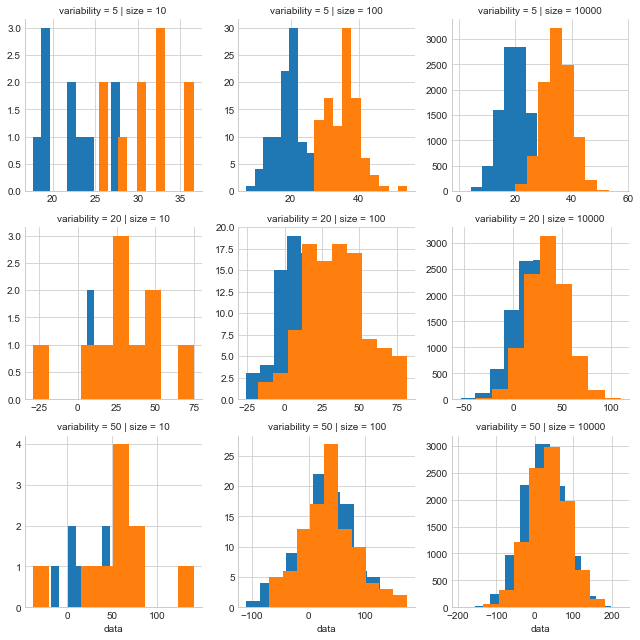

In [15]:
#Plotting the data
#Because the df is organized with a stacked (long) format, the plotting code is straight forward.

sns.set_style('whitegrid')

g = sns.FacetGrid(data, col='size', row='variability', hue='groups', sharex=False, sharey=False)
g.map(plt.hist,'data')
plt.show()

Notice how, as variance gets larger (staying in the same column and comparing down rows) it gets harder and harder to tell the means apart. Comparing within a row, however, it is clear that regardless of variance, larger sample sizes make it easier to tell the means apart. Even when the variance is at its highest (variance = 50), it is possible to discern two distinct peaks when the sample size is 10000 (lower right corner graph).

Now let's calculate t-tests for each of these plots. The t-test statistic provides a one-number summary of the information in the plot above. Rather than squinting at two overlapping probability distributions and trying to intuit whether they are different, we can use hard numbers:

In [16]:
#Setting the three non-data columns to work as multi-indices.
#This makes it easier to get subsections of stacked data.

data_test = data.set_index(['groups','size','variability'])
data_test.head()

data
groups size variability           
group1 10   5            22.483571
            5            19.308678
            5            23.238443
            5            27.615149
            5            18.829233

In [17]:
# Storing our t-values and p-values
tvalues=[]
pvalues=[]

#For each combo of sample size and variability, compare the two gorups using a t-test
for size in sizes:
    for var in variability:
        # Extracts data from data_test according to 
        #     group, size and variability for mean of 20 (a) and mean of 35 (b).
        a = data_test['data'].xs(('group1',size,var),level=('groups','size','variability'))
        b = data_test['data'].xs(('group2',size,var),level=('groups','size','variability'))
        
        # Compares a and b with t test.
        tval, pval=stats.ttest_ind(b, a, equal_var=True)
        
        # Appends t and p values to list.
        tvalues.append(tval)
        pvalues.append(pval)

In [21]:
#Creating a data frame for plotting purposes.
tvalues_plot=pd.DataFrame({'t':tvalues,
                           'p':pvalues,
                          'variability':variability*3,
                          'size':np.repeat(sizes,3)})

tvalues_plot.head()

,p,size,t,variability
0,4.601957e-05,10,5.326814,5
1,5.740987e-01,10,0.572449,20
2,1.708386e-01,10,1.426503,50
3,3.721191e-59,100,23.489845,5
4,9.986173e-08,100,5.531061,20


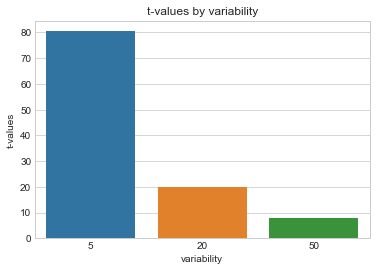

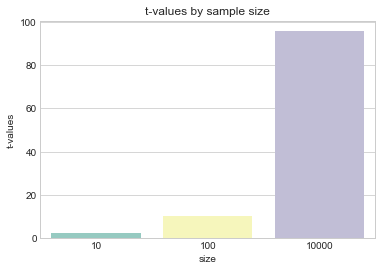

In [20]:

# t-values by variability
ax = sns.barplot(y='t',x='variability',ci=None,data=tvalues_plot)
ax.set(ylabel='t-values',title='t-values by variability')
plt.show()

# t-values by sample size
ax = sns.barplot(y='t',x='size',ci=None,data=tvalues_plot,palette='Set3')
ax.set(ylabel='t-values',title='t-values by sample size')
plt.show()

In [28]:
# DRILL

def tstat(y1, y2, s1, s2, n1, n2):
    return (y1 - y2)/(s1**2/n1 + s2**2/n2)**(1/2)
    

In [29]:
tstat(y1=5,y2=8,s1=1,s2=3,n1=200,n2=500)

-19.78141420187361

In [30]:
tstat(1090,999,400,30,900,100)

6.658536585365854

In [31]:
tstat(45,40,45,40,2000,2000)

3.7139067635410377